In [7]:
import numpy as np
import matplotlib.pyplot as plt

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical simulation 8: Variational Montecarlo and Simulated annealing</span>
### <span style="color:orange">  Numerical exercises 8.01 & 8.02</span>

In this simulation I will try to implemet a code that uses both a variational Montecarlo approach and a the Simulated Annealing to approximate the ground state of an hamiltonian. The one dimensional quantum system under examination is given by one particle confined by the following potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
The variational optimization starts for a reasonable guess for the eigenfunction for the gruond state:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
This problem cannot be solved analytically, thus it must be tackled through numerical methods.
This approximation of the wave function depends on two parameters $\mu$ and $\sigma$, whose optimal values will be defined through the Simulated Annealing. The basi idea of simulated annealing comes from metallurgy: it stems from the concept of annealing. It is a technique which involves the heating and the controlled cooling of a material to modify its physical properties. Simulated annealing is usually appliend in complex computational optimization, such as TSP problem. It must be noted though that this techinique is an approximation techinique that returns an extimate of the global optimum. It could happen that the algorithm may not be able to find a satisfying approximation for the global optimum because it meey be trapped in local minima, which are constituted by sets of neighbouring points whose energy is consistently lower than their neighbours' one. To develop a simulated annealing algorithm the starting point is the definition of a cooling law for the temperature of the system and an objective function, whiose minimu is going to be searched. The objective function will be in this case the total energy of the system:
$$
\langle {\hat H} \rangle_T = V(x) + \frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$
Than the cooling law can be defined so that every 10 iteration of the algorithm (i), the temperature T, 10, is decresed through a cooling factor k, 0.9, every 10 simulated annealing steps, as follows:
$$
T_{new}(k) = T_{old} \cdot k
$$
Then the probability of transitioning between neighbouring states is uniform, but the probability of accepting a new state is given by:
- if the energy in the new state is lower than the energy in the older state, than the new state is accepted with probability 1;
- otherwise the state is accepted if:
$$
\exp{[-(e_{new}- e_{old})/T]} \ge rand(0;1)
$$

To analyze the space of the parameters for $\sigma$ and $\mu$ I defined a limited interval for the exploration for both parameters, and an initial temperaure of 100.
The search of the minimum of the energy will implemented at the same time using a variational montecarlo technique, sampling the function: $|\Psi_{\mu, \sigma}(x)|^{2}$: 
- a new point will be accpeted if rand(0;1) < A, and A is defined as 
  $$
  A = min(1, \Psi_{\mu, \sigma}(x_{new}) / \Psi_{\mu, \sigma}(x_{old}))
  $$
 
Let's start by visualizing an analytical approach to the problem an see which are the reference value for the ground state energy.

Ground state energy:  -0.460465879692715
1st excited state energy:  0.0974247133176097
2nd excited state energy:  1.9717331343930198


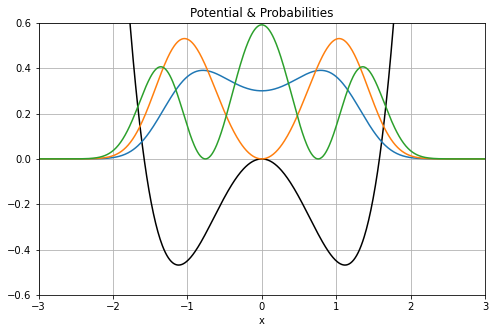

In [32]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

Now let's visualize the trajectory in the space of the parameters $\mu$ and $\sigma$ for the energy, during the simualated annealing process and the value of $< \hat H >$

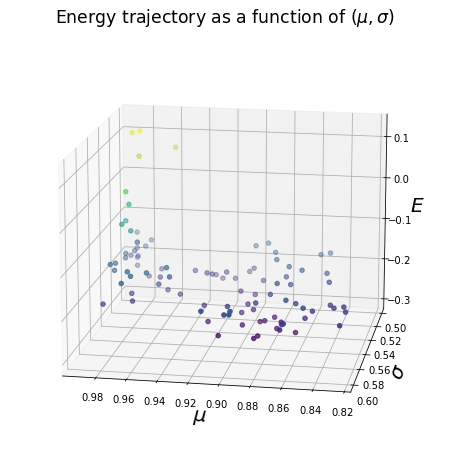

In [33]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
parameters = np.load('param.npy')
mu = parameters[:,1]
sigma = parameters[:,0]
energySA = np.load('sa_ene.npy')
errorSA = np.load('err_mene_sa.npy')

ax.scatter3D(mu, sigma, energySA, c=energySA, cmap='viridis')
ax.set_xlabel("$\mu$", fontsize = 20)
ax.set_ylabel("$\sigma$", fontsize = 20)
ax.set_zlabel("$E$", fontsize = 20)
ax.set_title("Energy trajectory as a function of $(\mu, \sigma)$", fontsize = "xx-large")
ax.view_init(15, 100)

plt.show()

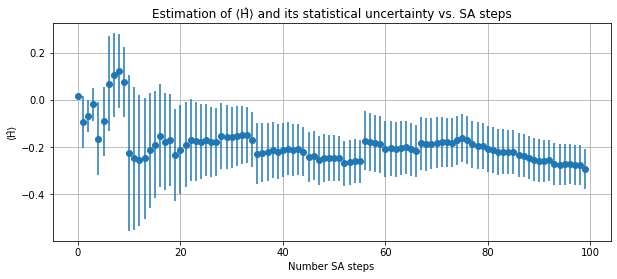

The optimal values of mu and sigma are:
0.8645273400456853
0.5522566767368268


In [34]:
num_samples = 100
fig1 = plt.subplots(figsize =(10,4))
plt.errorbar(range(num_samples), energySA, yerr=errorSA, fmt='o')
plt.xlabel("Number SA steps")
plt.ylabel("⟨Ĥ⟩")
plt.title("Estimation of ⟨Ĥ⟩ and its statistical uncertainty vs. SA steps")
plt.grid('True')
plt.show()


index1 = np.where(energySA==np.min(energySA))
mu = parameters[index1[0][0]][1]
sigma = parameters[index1[0][0]][0]
print('The optimal values of mu and sigma are:')
print(mu)
print(sigma)

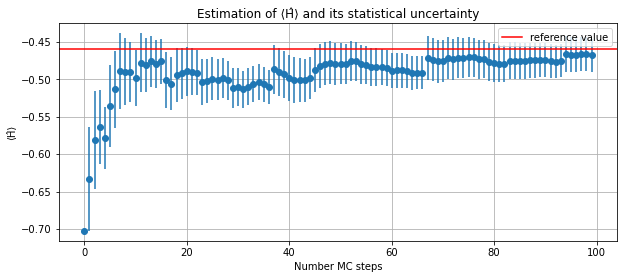

In [35]:
fig3 = plt.subplots(figsize= (10,4))
mean1 = np.load('EnMC.npy')
error1= np.load('errorEnMC.npy')
plt.errorbar(range(100), mean1, yerr=error1, fmt='o')
plt.axhline(y=-0.46, color = 'red', label='reference value')
plt.xlabel("Number MC steps")
plt.ylabel("⟨Ĥ⟩")
plt.title("Estimation of ⟨Ĥ⟩ and its statistical uncertainty")
plt.grid('True')
plt.legend()
plt.show()


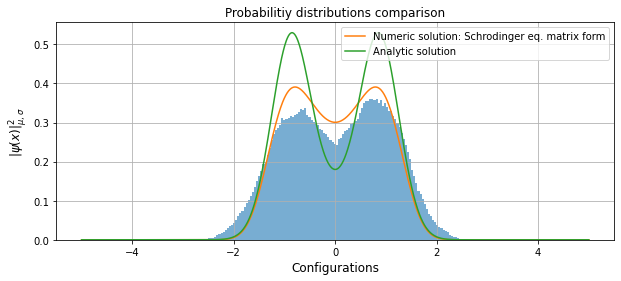

In [36]:

x = np.linspace(-5, 5, 1000)
norm = 1/(sigma * np.sqrt(2*np.pi))
psi_anal = np.exp((-(x-mu)**2)/(2*sigma**2)) + np.exp((-(x+mu)**2)/(2*sigma**2))

#Soluzione numerica utilizzando la forma matriciale dell'equazione di Schrodinger

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#Plot
configurations= np.load('conf.npy')
fig2 = plt.subplots(figsize = (10,4) )
plt.hist(configurations, bins='auto', density=True, alpha = 0.6)

plt.plot(x,(psi[0])**2, label = "Numeric solution: Schrodinger eq. matrix form")
plt.plot(x, norm*norm*psi_anal*psi_anal, label = "Analytic solution")
plt.legend( loc='best', fontsize = "medium")

plt.title("Probabilitiy distributions comparison", fontsize = "large")
plt.xlabel("Configurations", fontsize = "large")
plt.ylabel("$|\psi(x)|_{\mu, \sigma}^2$", fontsize = "large")
plt.grid(True)
plt.show()


### Analysis of the results:
Thanks to the SA routine the optimal value found for $\mu$ and $\sigma$ are:


In [31]:
print( mu)
print(sigma)

0.8754384704993464
0.5613419937952773


The energy for the ground state over $5\cdot 10^{5}$ MC steps is extimated within one standard deviation with respect to the real value. The sampled configurations give an histogram which is comparable with the numeric solution.